In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings as wn
wn.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')

In [3]:
train_df.shape, test_df.shape

((159256, 24), (106171, 23))

In [4]:
train_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [5]:
train_df.isnull().sum().any(), test_df.isnull().sum().any()

(False, False)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

# Data Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

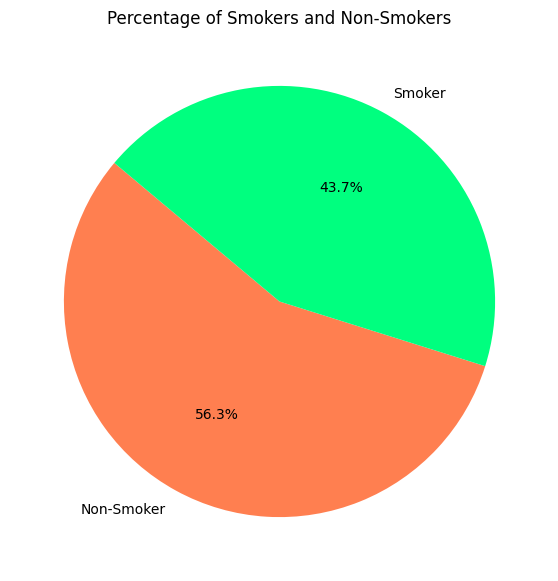

In [8]:
smoker_counts = train_df['smoking'].value_counts()

# Get the labels and counts
labels = ['Non-Smoker', 'Smoker']
counts = [smoker_counts[0], smoker_counts[1]]

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['coral', 'springgreen'])
plt.title('Percentage of Smokers and Non-Smokers')
plt.show()

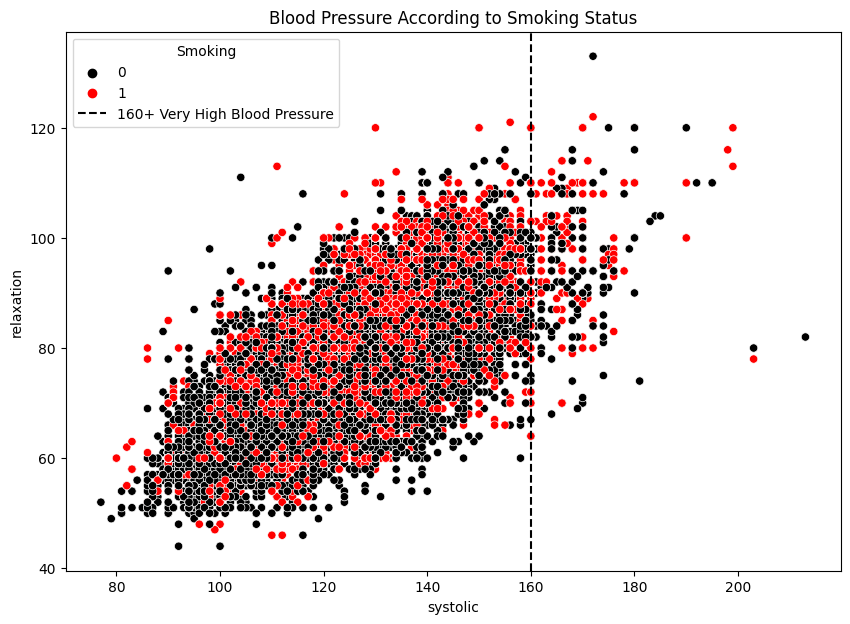

In [9]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=train_df['systolic'], y=train_df['relaxation'], palette=['black','red'], hue=train_df['smoking'])

# Add a threshold line at y-axis value 160
plt.axvline(x=160, color='black', linestyle='--',label='160+ Very High Blood Pressure')

plt.title('Blood Pressure According to Smoking Status')
plt.legend(title='Smoking')
plt.show()

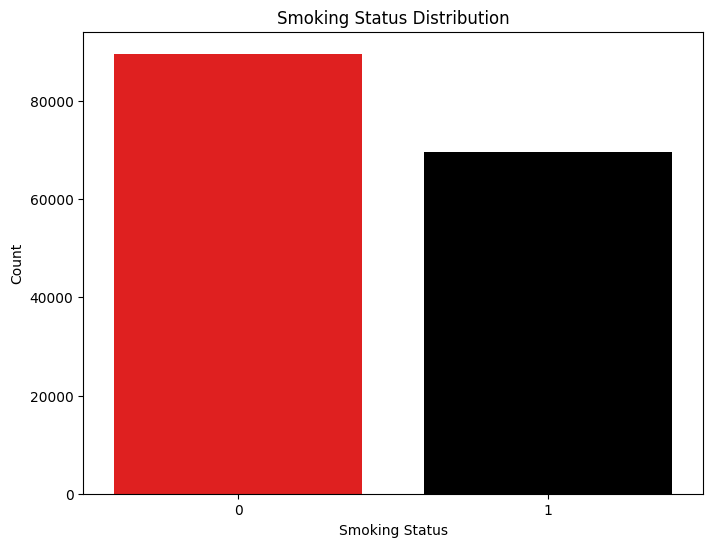

In [10]:
# check the smoking status
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='smoking',palette=['red','black'])
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

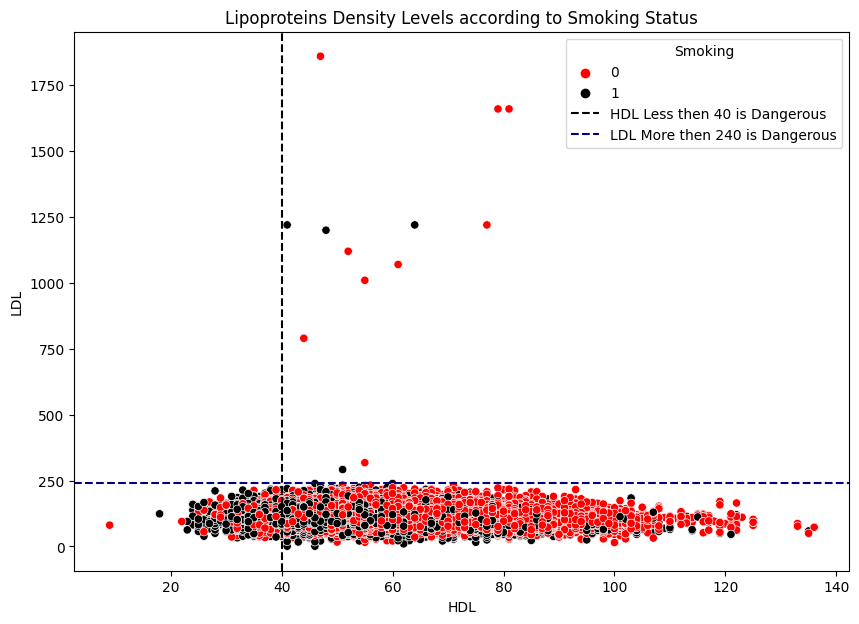

In [11]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=train_df['HDL'], y=train_df['LDL'],
                hue=train_df['smoking'], palette=['red','black'])

# Add a threshold line at y-axis value 160
plt.axvline(x=40, color='black', linestyle='--', label='HDL Less then 40 is Dangerous')
plt.axhline(y=240, color='navy', linestyle='--', label='LDL More then 240 is Dangerous')

plt.title('Lipoproteins Density Levels according to Smoking Status')
plt.legend(title='Smoking')
plt.show()

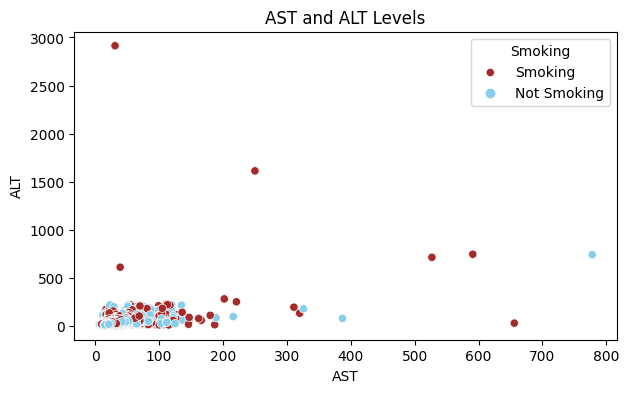

In [12]:
# Check the Liver Status using AST and ALT Level
plt.figure(figsize=(7, 4))
sns.scatterplot(x=train_df['AST'], y=train_df['ALT'],
                hue=train_df['smoking'], palette=['skyblue','brown'])
plt.title('AST and ALT Levels')
plt.legend(title='Smoking', labels=['Smoking', 'Not Smoking'])
plt.show()

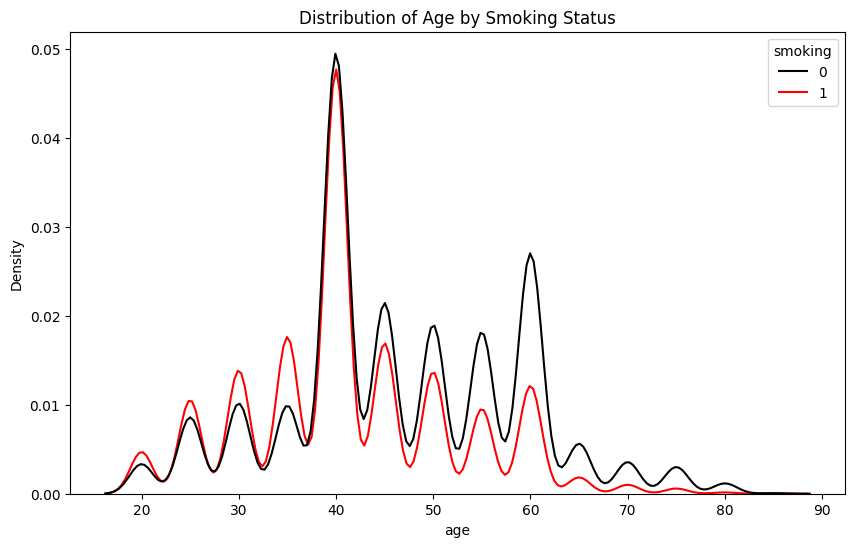

In [13]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Age by Smoking Status')
sns.kdeplot(data=train_df, x='age', hue='smoking', palette=['Black','Red'])
plt.show()

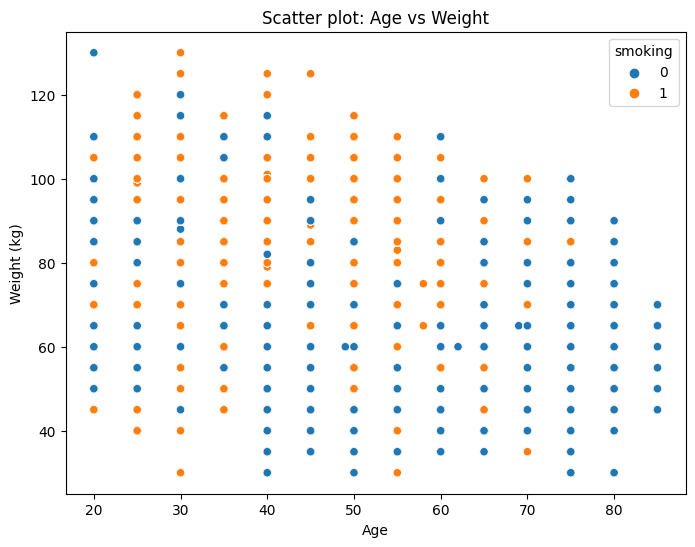

In [14]:
# Scatter plot between Age and Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x='age', y='weight(kg)', hue='smoking')
plt.title('Scatter plot: Age vs Weight')
plt.xlabel('Age')
plt.ylabel('Weight (kg)')
plt.show()

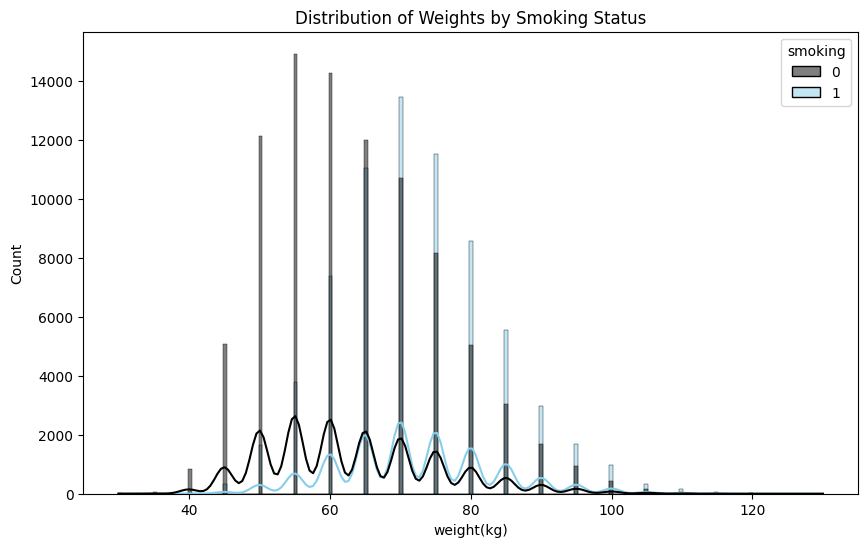

In [15]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Weights by Smoking Status')
sns.histplot(data=train_df, x='weight(kg)', hue='smoking',kde=True, palette=['black','skyblue'])
plt.show()

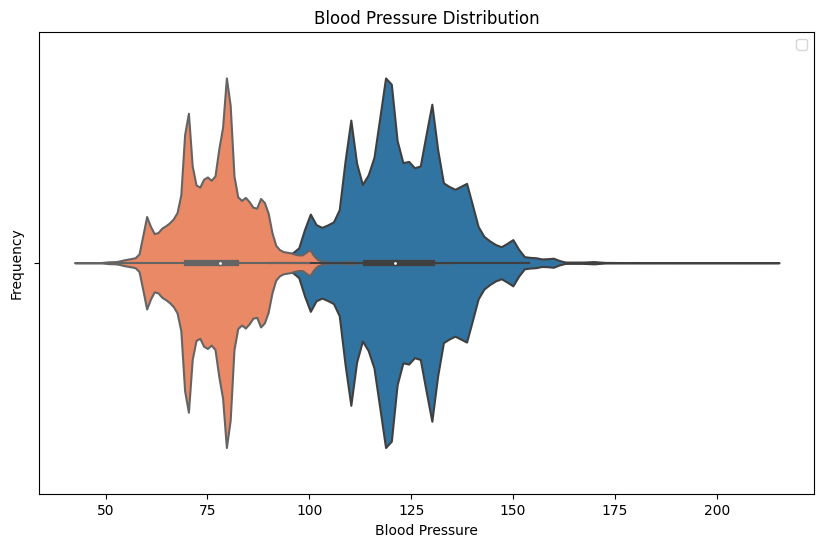

In [16]:
plt.figure(figsize=(10, 6))

# Systolic Blood Pressure Distribution
sns.violinplot(data=train_df, x='systolic', alpha=0.5, label='Systolic')

# Diastolic Blood Pressure Distribution
sns.violinplot(data=train_df, x='relaxation', color='coral',alpha=0.5, label='Diastolic')

plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.legend()
plt.show()


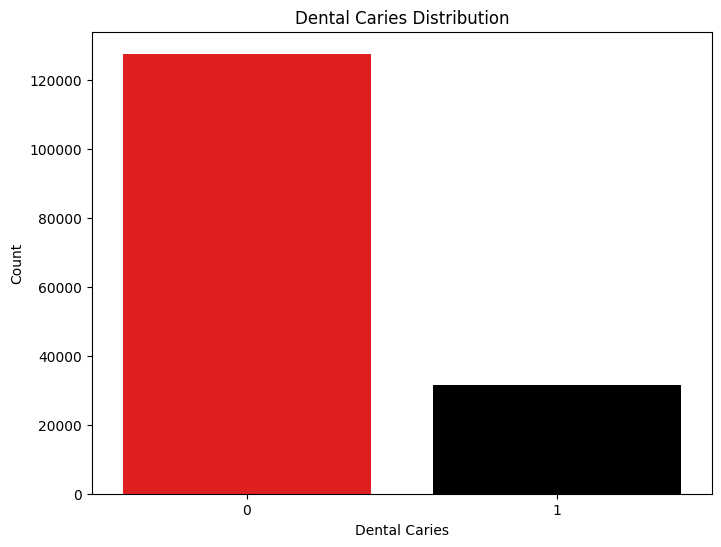

In [17]:
# Dental Caries Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='dental caries',palette=['red','black'])
plt.title('Dental Caries Distribution')
plt.xlabel('Dental Caries')
plt.ylabel('Count')
plt.show()

# Idenfiying and removing Outliers

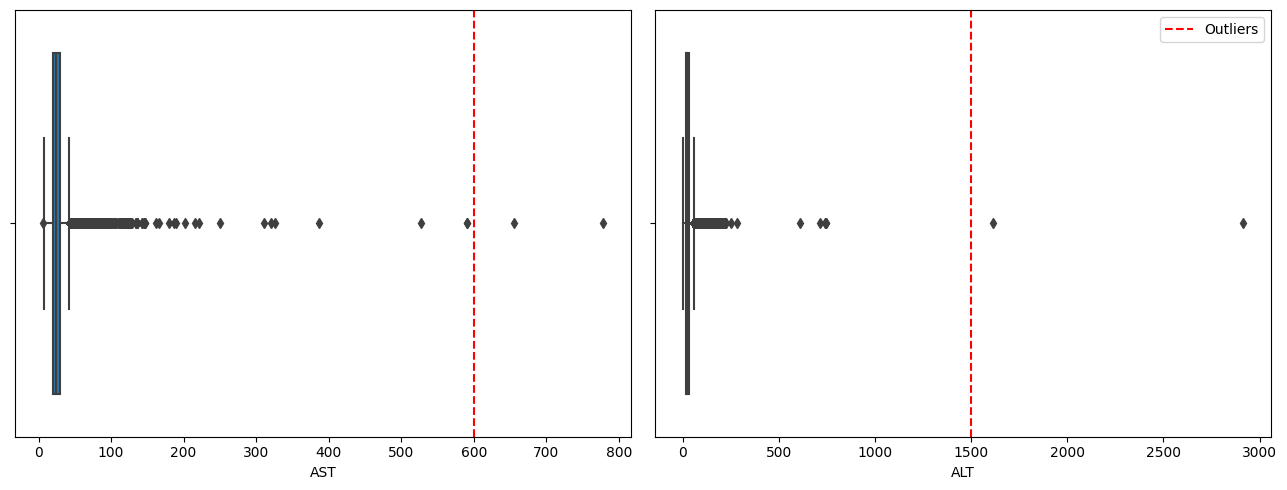

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# Plot boxplots
sns.boxplot(data=train_df, x='AST', ax=ax[0])
ax[0].axvline(x=600, color='red', linestyle='--', label='Outliers')

sns.boxplot(data=train_df, x='ALT', ax=ax[1])
ax[1].axvline(x=1500, color='red', linestyle='--', label='Outliers')


# Adjust layout and show plot
plt.tight_layout()
plt.legend()
plt.show()

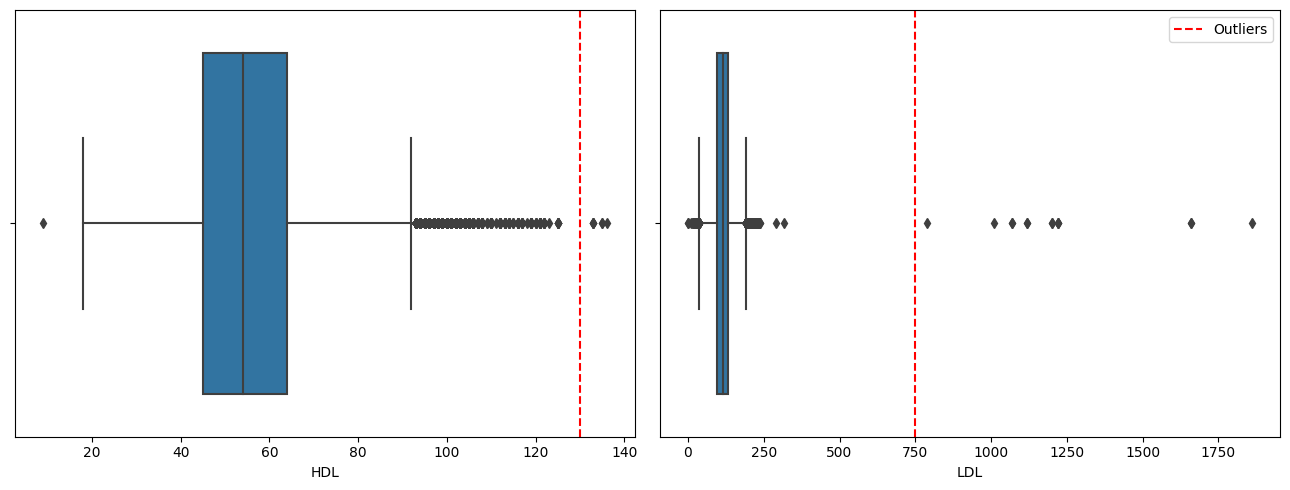

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# Plot boxplots
sns.boxplot(data=train_df, x='HDL', ax=ax[0])
ax[0].axvline(x=130, color='red', linestyle='--', label='Outliers')

sns.boxplot(data=train_df, x='LDL', ax=ax[1])
ax[1].axvline(x=750, color='red', linestyle='--', label='Outliers')


# Adjust layout and show plot
plt.tight_layout()
plt.legend()
plt.show()

In [20]:
def remove_outliers(df, column_names):
    # Define an empty DataFrame to store filtered data
    df_filtered = df.copy()
    
    # Loop through each column name
    for column_name in column_names:
        # Calculate the first quartile (Q1) and third quartile (Q3) for the current column
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        
        # Calculate the interquartile range (IQR) for the current column
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds for outliers for the current column
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out outliers for the current column
        df_filtered = df_filtered[(df_filtered[column_name] >= lower_bound) & (df_filtered[column_name] <= upper_bound)]
    
    return df_filtered


In [21]:
train_df.shape

(159256, 24)

In [22]:
# these columns have some outliers
outliers_cols = ['LDL','AST','ALT']

In [23]:
train_df = remove_outliers(train_df, column_names=outliers_cols)
train_df.shape

(148402, 24)

<Axes: >

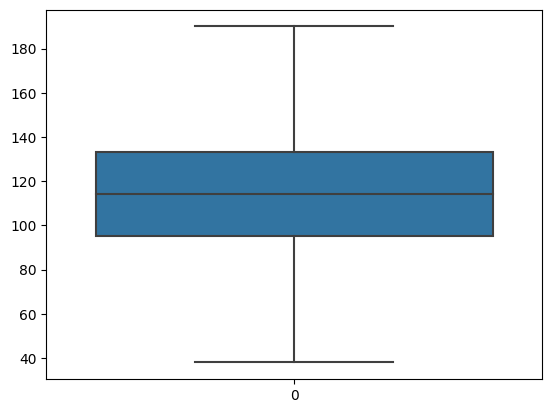

In [24]:
sns.boxplot(train_df['LDL'])

# Feature Engineering

In [25]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [26]:
train_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [27]:
train_df.drop('id',axis=1, inplace=True)
train_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


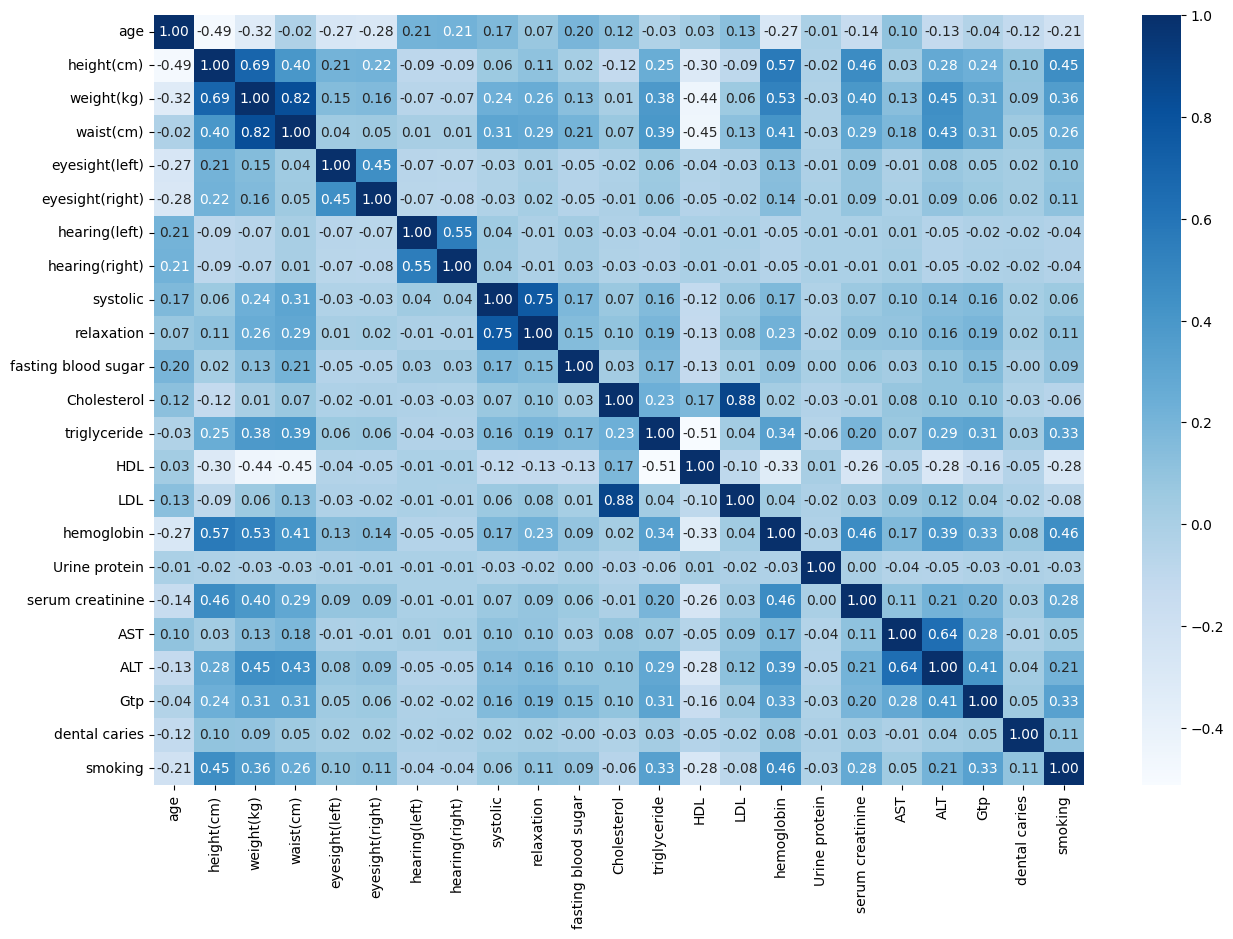

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [29]:
X = train_df.drop(columns=['smoking'])  # Remove the target column from features
y = train_df['smoking']  # Target variable

In [30]:
k_best = SelectKBest(score_func=f_classif, k=20)  # Select top 5 features
k_best.fit_transform(X, y)[0]

array([ 55. , 165. ,  60. ,  81. ,   0.5,   0.6,   1. , 135. ,  87. ,
        94. , 172. , 300. ,  40. ,  75. ,  16.5,   1. ,  22. ,  25. ,
        27. ,   0. ])

In [31]:
selected_mask = k_best.get_support()
selected_features = X.columns[selected_mask]
dropped_features = X.columns[~selected_mask]

print("Selected Features:")
print(selected_features)

print("\nDropped Features:")
print(dropped_features)

Selected Features:
Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'systolic', 'relaxation',
       'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
       'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries'],
      dtype='object')

Dropped Features:
Index(['hearing(right)', 'Urine protein'], dtype='object')


In [32]:
X_selected = X[selected_features]
X_selected.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries
0,55,165,60,81.0,0.5,0.6,1,135,87,94,172,300,40,75,16.5,1.0,22,25,27,0
1,70,165,65,89.0,0.6,0.7,2,146,83,147,194,55,57,126,16.2,1.1,27,23,37,1
2,20,170,75,81.0,0.4,0.5,1,118,75,79,178,197,45,93,17.4,0.8,27,31,53,0
3,35,180,95,105.0,1.5,1.2,1,131,88,91,180,203,38,102,15.9,1.0,20,27,30,1
4,30,165,60,80.5,1.5,1.0,1,121,76,91,155,87,44,93,15.4,0.8,19,13,17,0


In [33]:
std_scal = MinMaxScaler()
X_ = std_scal.fit_transform(X_selected)
X_[0]

array([0.53846154, 0.54545455, 0.3       , 0.39473684, 0.04081633,
       0.05102041, 0.        , 0.42647059, 0.48314607, 0.14589666,
       0.36160714, 0.54074074, 0.24409449, 0.24342105, 0.72049689,
       0.09183673, 0.42857143, 0.43636364, 0.02409639, 0.        ])

# Data Modeling

In [34]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve

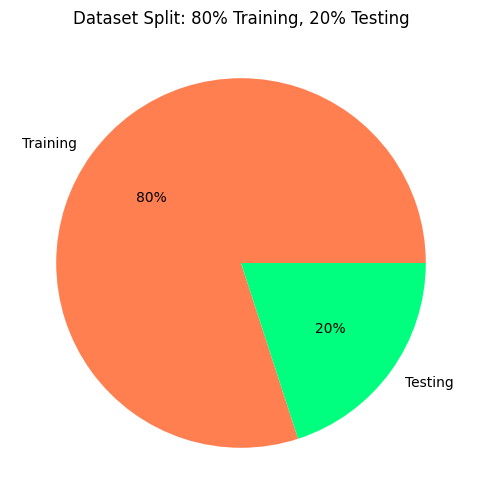

In [35]:
# Define the proportions
training_proportion = 0.8
testing_proportion = 0.2
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([training_proportion, testing_proportion], labels=['Training', 'Testing'], autopct='%1.0f%%', colors=['coral', 'springgreen'])
plt.title('Dataset Split: 80% Training, 20% Testing')
plt.show()

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X_selected,y,test_size=0.2)

In [37]:
x_train.shape,x_test.shape

((118721, 20), (29681, 20))

In [38]:
def train_classification_models(x_train, y_train):
    models = {
        'RandomForest': RandomForestClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
        'NaiveBayes': GaussianNB(),
        'NeuralNetwork': MLPClassifier(),
        'KNeighbors': KNeighborsClassifier(),
        'AdaBoost': AdaBoostClassifier()
    }

    trained_models = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        trained_models[name] = model
    return trained_models

In [39]:
trained_models = train_classification_models(x_train,y_train)

In [40]:
def evaluate_classification_models(x_test, y_test, trained_models):
    results = []

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, (name, model) in enumerate(trained_models.items()):
        y_pred = model.predict(x_test)
        score = model.score(x_test, y_test)
        cm = confusion_matrix(y_test, y_pred)

        results.append({'model_name': name, 'score': score})

        # Plotting confusion matrix as a heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'{name}\nAccuracy: {score:.2f}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

    results_df = pd.DataFrame(results)
    return results_df

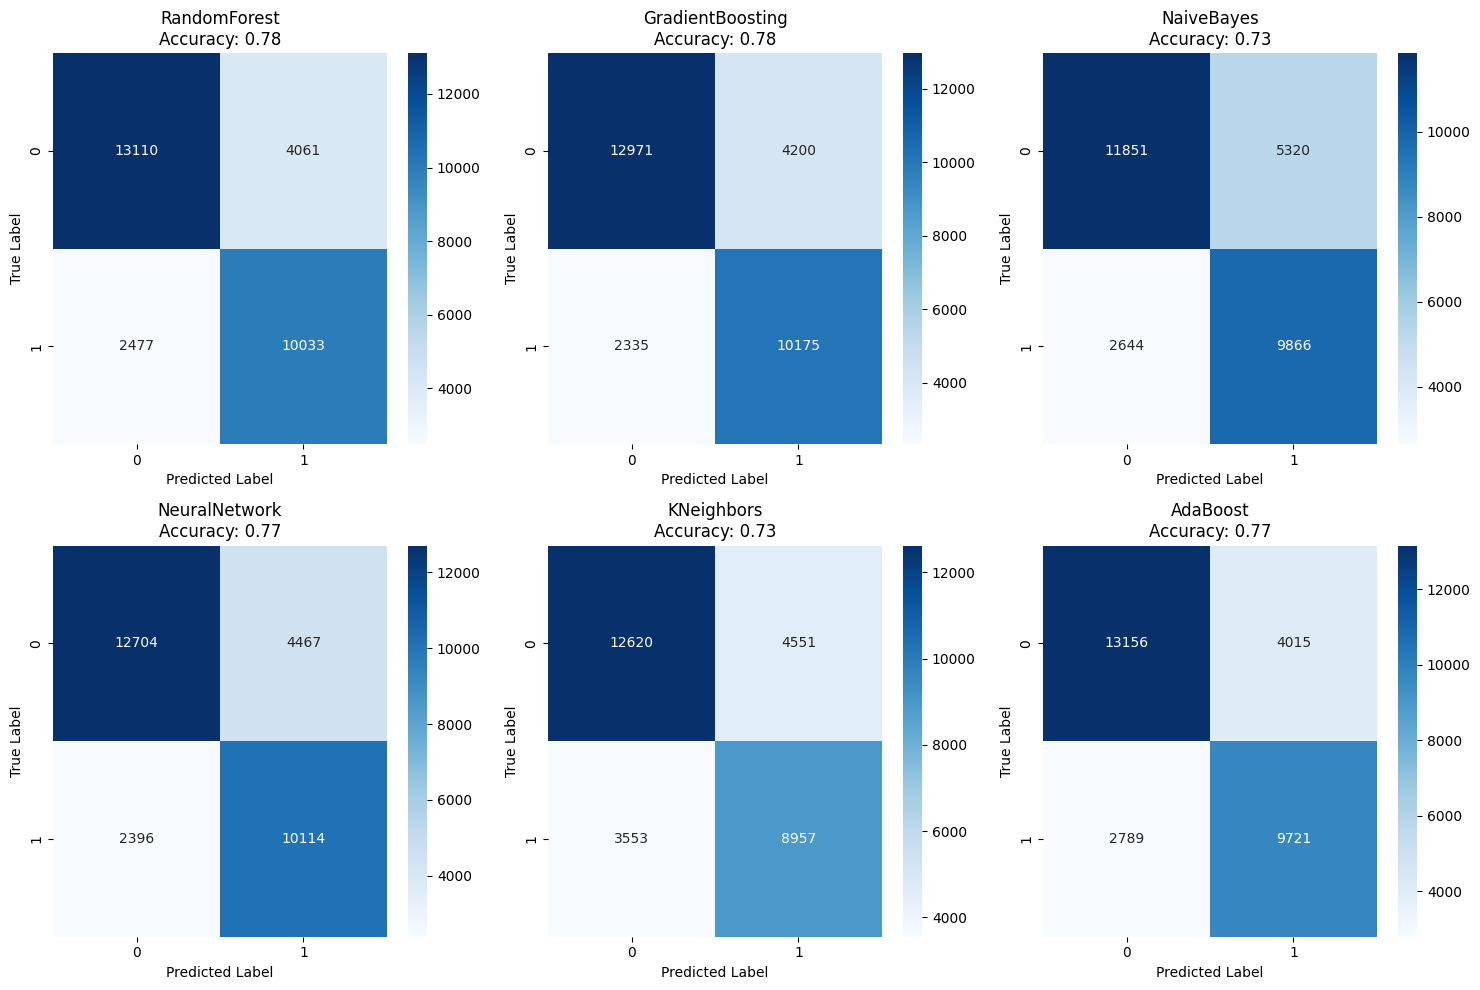

,model_name,score
0,RandomForest,0.779724
1,GradientBoosting,0.779825
2,NaiveBayes,0.731680
3,NeuralNetwork,0.768775
4,KNeighbors,0.726963
5,AdaBoost,0.770762


In [41]:
evaluate_classification_models(x_test,y_test,trained_models)

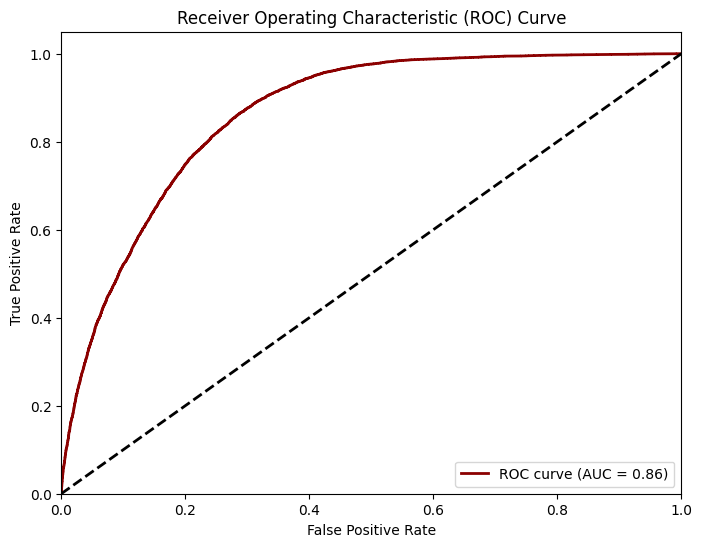

In [42]:
# Assuming you have predicted probabilities stored in pred_probs
pred_probs = trained_models['GradientBoosting'].predict_proba(x_test)[:, -1]
# Compute AUROC
auc_score = roc_auc_score(y_test, pred_probs)
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [43]:
xg=XGBClassifier(n_estimators=100,max_depth=5,min_child_weight=1,max_delta_step=0,random_state=42)
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)

<Axes: >

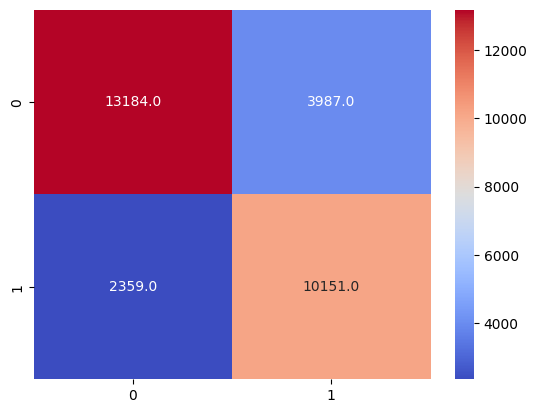

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.1f',cmap='coolwarm')

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81     17171
           1       0.72      0.81      0.76     12510

    accuracy                           0.79     29681
   macro avg       0.78      0.79      0.78     29681
weighted avg       0.79      0.79      0.79     29681



# Apply On TestSet

In [46]:
test_df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [47]:
test_df_id = test_df['id']
test_df.drop('id',axis=1,inplace=True)
test_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,165,70,84.0,1.2,1.2,1,1,130,89,...,186,49,115,14.2,1,0.9,19,25,32,0
1,80,160,60,93.0,1.0,1.0,2,2,144,72,...,158,35,104,13.0,1,1.1,20,12,24,0
2,60,170,70,86.5,0.6,0.7,1,1,117,75,...,173,39,88,15.4,1,1.4,38,60,36,0
3,40,160,50,67.0,0.3,0.4,1,1,116,62,...,47,75,128,14.5,1,0.6,25,18,10,1
4,40,170,75,89.4,1.0,0.9,1,1,132,94,...,100,39,123,16.5,1,1.0,30,39,27,1


In [48]:
test_df = test_df[selected_features]
test_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries
0,40,165,70,84.0,1.2,1.2,1,130,89,107,200,186,49,115,14.2,0.9,19,25,32,0
1,80,160,60,93.0,1.0,1.0,2,144,72,93,172,158,35,104,13.0,1.1,20,12,24,0
2,60,170,70,86.5,0.6,0.7,1,117,75,92,161,173,39,88,15.4,1.4,38,60,36,0
3,40,160,50,67.0,0.3,0.4,1,116,62,91,213,47,75,128,14.5,0.6,25,18,10,1
4,40,170,75,89.4,1.0,0.9,1,132,94,79,170,100,39,123,16.5,1.0,30,39,27,1


In [49]:
minMax_scl = MinMaxScaler()
test_ds = minMax_scl.fit_transform(test_df)
test_ds[0:1]

array([[0.30769231, 0.54545455, 0.4       , 0.43024772, 0.1122449 ,
        0.1122449 , 0.        , 0.41549296, 0.49      , 0.16180371,
        0.44224422, 0.32962963, 0.23846154, 0.09351928, 0.57142857,
        0.08163265, 0.01683938, 0.00823893, 0.03009027, 0.        ]])

In [50]:
test_pred_probs = trained_models['GradientBoosting'].predict_proba(test_ds)[:, -1]

In [51]:
dic = {'id':test_df_id,'smoking': test_pred_probs}
final_sub_df = pd.DataFrame(dic)
final_sub_df.head()

,id,smoking
0,159256,0.239679
1,159257,0.239679
2,159258,0.239679
3,159259,0.239931
4,159260,0.239931


In [52]:
final_sub_df.to_csv('submission.csv',index=False)